In [38]:
import re
import glob

import skipthoughts
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

In [84]:
def sentence_spliter(text):
    #split the sentence based on the occurance of the [. or ! or ?]
    #split the sentence based on the occurance of ] or ) or " or '
    return re.split(' *[\.\?\!][\'"\)\]]* *', text)
    

In [86]:
def sentence_preprocessor(sentence):
    #first convert everything in to lower-case
    ps = sentence.lower()
    #replace 's with original word
    ps = re.sub(r'([\w])?(\'s)', r'\1', ps)
    #attempt to remove all special characters including full stops
    ps = re.sub(r'[^\w\s]','', ps)
    #substitute all numbers in the sentences to "", this is a experimental approach,
    ps = re.sub(r'\d', '', ps)
    #some sentences begin with white spaces, or end with white spaces, remove them
    ps = re.sub(r'(^[\s]*)|([\s]*$)', "", ps)
    #remove multiple occurances of space
    ps = re.sub(r'[\s]{2,}', " ", ps)
    return ps
    


In [78]:
#test-sentence_preprocessor

print(sentence_preprocessor("THIS IS A TEST SENTENCE."))
print(sentence_preprocessor("The phone's battery is pathetic!"))
print(sentence_preprocessor("The phone has 3 cameras."))
print(sentence_preprocessor("This sentence has  two white spaces"))
print(sentence_preprocessor("             ,This begin's with a white space,  has double spaces and digits like 1,2,3 "))


this is a test sentence
the phone battery is pathetic
the phone has cameras
this sentence has two white spaces
this begin with a white space has double spaces and digits like


In [35]:
#Takes a file. Tokenizes each sentence into list of words and add it to the return list.
def tokenize_file(filename,ignore_list):
    file_list=[]
    with open(filename) as infile:
        for line in infile:
            processed_line=remove_punctuation(line)
            file_list.append(tokenize(processed_line,ignore_list))
    return file_list

In [ ]:
#Takes a filename and converts each line in the file to list and returns all these lists as a list
def make_list(filename):
    sentence_list=[]
    with open(filename) as infile:
        for line in infile:
            sentence_list.append([line.rstrip()])
    return sentence_list


In [3]:
model = skipthoughts.load_model()
encoder = skipthoughts.Encoder(model)

/home/blueminds/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/ /home/blueminds/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/uni_skip.npz
Loading model parameters...
<built-in method items of collections.OrderedDict object at 0x7fba3099d488>
<built-in method items of collections.OrderedDict object at 0x7fba2dac2ae8>
Compiling encoders...
Loading tables...
/home/blueminds/sfsu/nlt/text_summarization/skipthoughts/Text-Summarization/data/
Packing up...


In [87]:
demoFile = open("demofile.txt", "rt")
text = demoFile.read()
sentence_list = sentence_spliter(text)
for s in sentence_list:
    print("Original\n {}".format(s))
    print(sentence_preprocessor(s))
    

Original
 Very happy with my 08 Accord
very happy with my accord
Original
 performance is quite adequate it has nice looks and is a great long
performance is quite adequate it has nice looks and is a great long
Original
 distance cruiser
distance cruiser
Original
 
6

Original
 4

Original
 3 eco engine has poor performance and gas mileage of 22 highway
eco engine has poor performance and gas mileage of highway
Original
 
Overall performance is good but comfort level is poor
overall performance is good but comfort level is poor
Original
 
I'm impressed with the performance as well as efficiency gains
im impressed with the performance as well as efficiency gains
Original
 
It has room
it has room
Original
 performance
performance
Original
 good MPG for its size and excellent reliability
good mpg for its size and excellent reliability
Original
 
For the record I test
for the record i test
Original
 drove the Lexus350 the BMW 5 series
drove the lexus the bmw series
Original
 the infiniti 

In [90]:
embedding_clusters = []
sentence_clusters  = {}
for i,s in enumerate(lines):
    vector = encoder.encode([s], verbose=False)
    embedding_clusters.append(vector[:, 2400:].tolist())
    sentence_clusters[i] = s    

ValueError: ('Sequence is shorter than the required number of steps : (n_steps, seq, seq.shape):', 1, array([], shape=(0, 1, 1), dtype=float32), (0, 1, 1))
Apply node that caused the error: forall_inplace,cpu,encoder__layers}(Elemwise{Maximum}[(0, 0)].0, Elemwise{sub,no_inplace}.0, InplaceDimShuffle{0,1,x}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, IncSubtensor{InplaceSet;:int64:}.0, encoder_U, encoder_Ux, ScalarFromTensor.0, ScalarFromTensor.0)
Toposort index: 50
Inputs types: [TensorType(int64, scalar), TensorType(float32, (False, False, True)), TensorType(float32, (False, False, True)), TensorType(float32, 3D), TensorType(float32, 3D), TensorType(float32, 3D), TensorType(float32, matrix), TensorType(float32, matrix), Scalar(int64), Scalar(int64)]
Inputs shapes: [(), (0, 1, 1), (0, 1, 1), (0, 1, 4800), (0, 1, 2400), (3, 1, 2400), (2400, 4800), (2400, 2400), (), ()]
Inputs strides: [(), (4, 4, 4), (4, 4, 4), (19200, 19200, 4), (9600, 9600, 4), (9600, 9600, 4), (19200, 4), (9600, 4), (), ()]
Inputs values: [array(1), array([], shape=(0, 1, 1), dtype=float32), array([], shape=(0, 1, 1), dtype=float32), array([], shape=(0, 1, 4800), dtype=float32), array([], shape=(0, 1, 2400), dtype=float32), 'not shown', 'not shown', 'not shown', 2400, 4800]
Outputs clients: [[Subtensor{int64}(forall_inplace,cpu,encoder__layers}.0, ScalarFromTensor.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [91]:
embedding_clusters = np.array(embedding_clusters)
print(embedding_clusters.shape)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=2)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


(169, 1, 2400)


In [93]:
print(sentence_clusters)
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    for label, embeddings  in zip(labels, embedding_clusters):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y,alpha=a, s=30)
        plt.annotate(label, alpha=0.5, xy=(x,y), xytext=(5, 5),
                         textcoords='offset points', ha='right', va='bottom', size=10)
            
    plt.show()

{0: 'Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long,  distance cruiser .\n', 1: '6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n', 2: 'Overall performance is good but comfort level is poor .\n', 3: "I'm impressed with the performance as well as efficiency gains .\n", 4: 'It has room, performance, good MPG for its size and excellent reliability .\n', 5: 'For the record I test, drove the Lexus350 the BMW 5 series, the infiniti G35 and enjoyed the Honda performance equally for far less money !\n', 6: 'Very happy with the car enjoy the ride and performance .\n', 7: 'The performance of the engine is very smooth .\n', 8: 'This car had rattles at 500 miles and has horrible performance even for a four cylinder .\n', 9: 'Great performance and handling make this a real Winner !\n', 10: 'Engine performance lacks punch after 60, head rest are poor design, lacks driver seat memory rear seat a c, radio system is marginal co

<IPython.core.display.Javascript object>


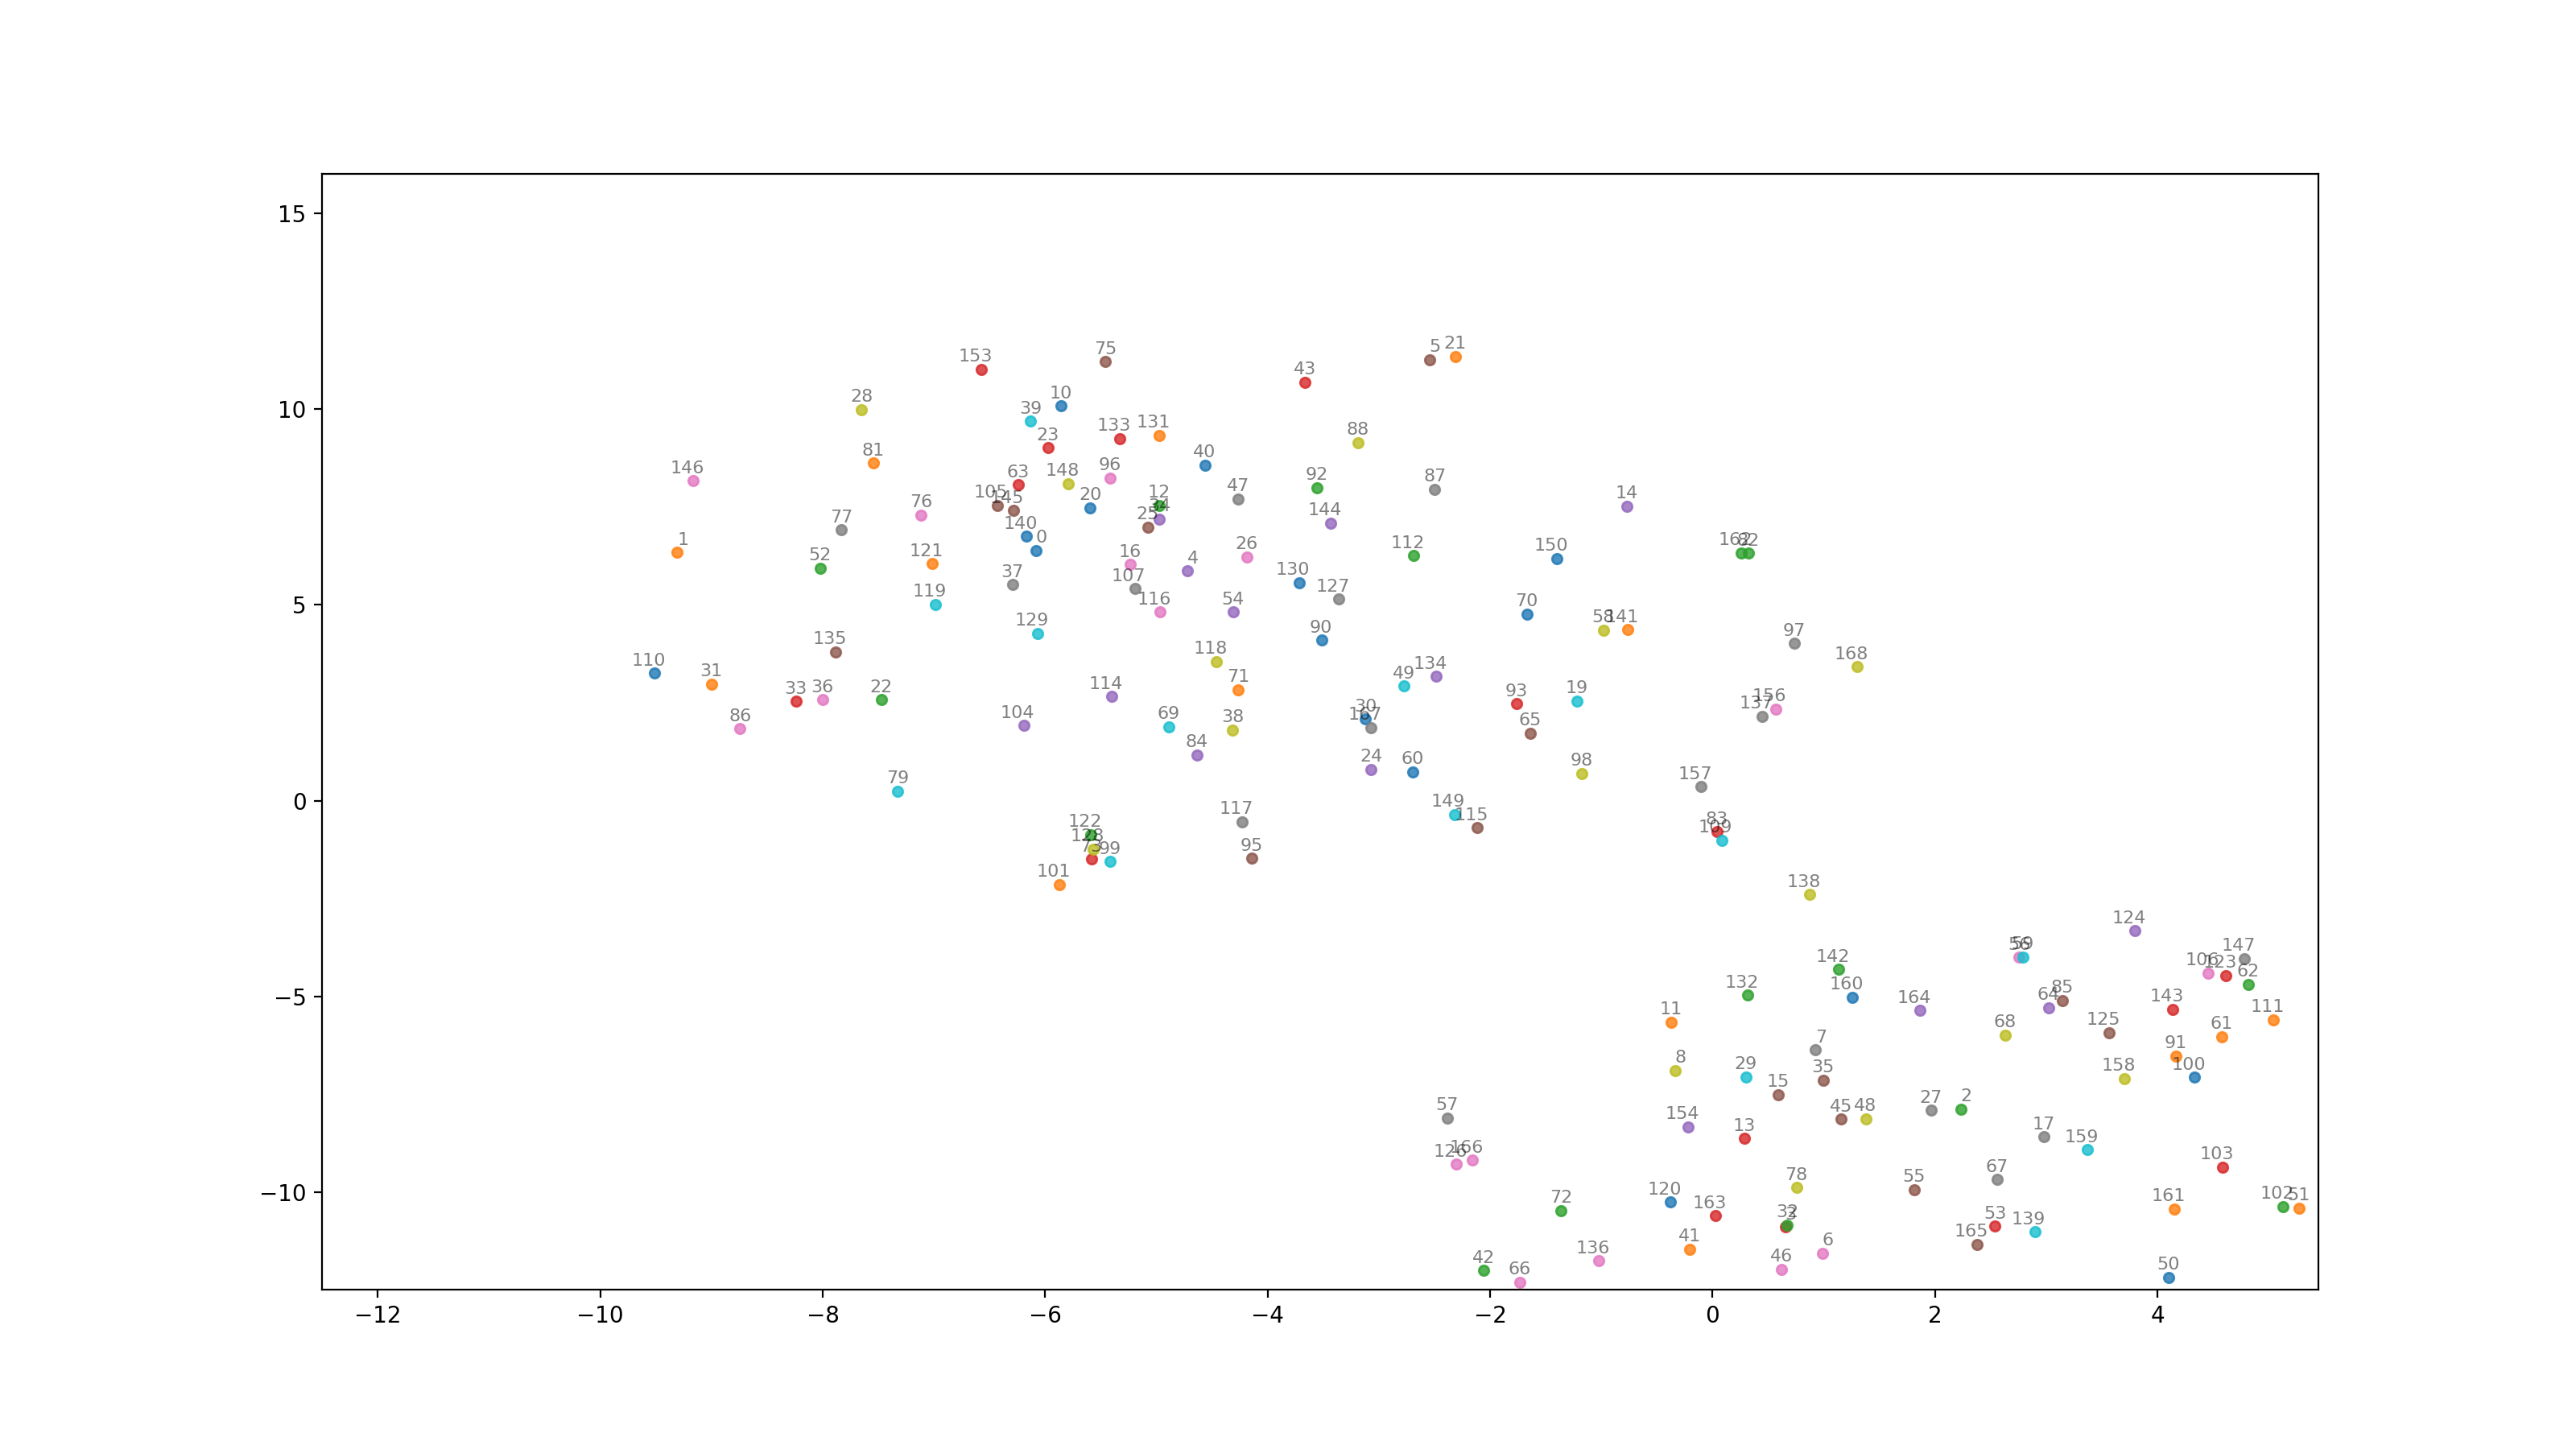

In [23]:
tsne_plot_similar_words('Sentence Embeddings', sentence_clusters.keys(), embeddings_en_2d, sentence_clusters, 0.8,
                        'sentence_embeddings.png')

In [95]:
for (key,value) in sentence_clusters.items():
    print("Label-{}::{}".format(key, value))

Label-0::Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long,  distance cruiser .

Label-1::6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .

Label-2::Overall performance is good but comfort level is poor .

Label-3::I'm impressed with the performance as well as efficiency gains .

Label-4::It has room, performance, good MPG for its size and excellent reliability .

Label-5::For the record I test, drove the Lexus350 the BMW 5 series, the infiniti G35 and enjoyed the Honda performance equally for far less money !

Label-6::Very happy with the car enjoy the ride and performance .

Label-7::The performance of the engine is very smooth .

Label-8::This car had rattles at 500 miles and has horrible performance even for a four cylinder .

Label-9::Great performance and handling make this a real Winner !

Label-10::Engine performance lacks punch after 60, head rest are poor design, lacks driver seat memory rear seat a c, rad

In [28]:
#99 : Very comfortable, quiet interior
#122: Very quiet and comfortable ride, more than enough power .
#128: Very comfortable, quite and smooth ride .


In [ ]:
#105 : It looks awesome, turns like it's on rails, has a great sound system, and is just comfortable and fun to drive .
#145 : It is a beautiful sapphire blue, has really nice lines, is very comfortable, is plenty peppy, and hugs the road .
#140 : Comfort is great, mileage is good overall, better on the road than expected  , compared to my 1999 Camry .